<a href="https://colab.research.google.com/github/ayfeng23/FB_algorithms/blob/main/Accelerated_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

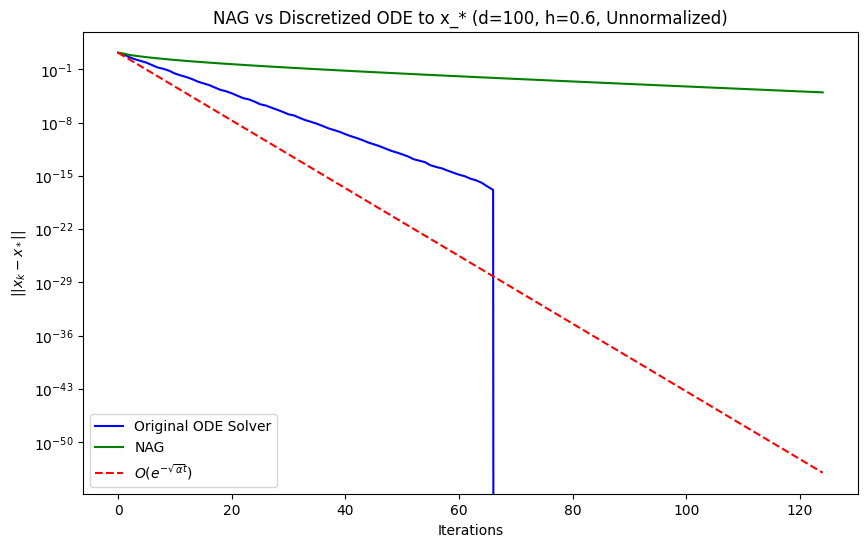

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Set random seed for reproducibility
np.random.seed(42)

# Problem parameters
d = 100  # Dimension

#crude construction of A
#A = np.random.randn(d, d)
#A = A.T @ A  # Make A symmetric positive definite

#randomly generated eigenvalues
eigenvalues = np.random.uniform(0.1, 10, size=d)
# Construct A using these eigenvalues
Q, _ = np.linalg.qr(np.random.randn(d, d))  # Generate a random orthogonal matrix
A = Q @ np.diag(eigenvalues) @ Q.T

normalized = False
if normalized:
  A = A / np.linalg.norm(A, ord=2)
b = np.random.randn(d)  # Random vector b
c = np.random.randn()  # Random scalar c

# Compute alpha and gamma
alpha = np.min(eigh(A, eigvals_only=True))  # Smallest eigenvalue of A
#alpha = np.min(eigenvalues)
gamma = 2 * np.sqrt(alpha)

# Time step
h = 0.6
num_steps = 125  # Total number of iterations

# Initialize x and v
x_vals = []
x = np.random.randn(d)  # Initial x
v = np.zeros(d)  # Initial velocity

# Function gradient
def grad_f(x):
    return A @ (x - b)

# Run the discretized ODE solver
for n in range(num_steps):
    x_vals.append(x.copy())  # Store x values
    v = np.exp(-gamma * h) * (v + grad_f(x) / gamma) - grad_f(x) / gamma
    x = x + h * v

x_vals = np.array(x_vals)

# Time array
t_vals = np.arange(num_steps)

# Theoretical baseline x_* = b
x_star = np.tile(b, (num_steps, 1))

# Fit an O(e^{-sqrt(alpha) t}) curve to ||x_n - x_*||
error_norm = np.linalg.norm(x_vals - x_star, axis=1)
t_fit = t_vals
fit_curve = np.exp(-np.sqrt(alpha) * t_fit)
fit_curve *= error_norm[0] / fit_curve[0]  # Scale to match initial error


# Compute L (largest eigenvalue) and m (smallest eigenvalue)
L = np.max(eigh(A, eigvals_only=True))
m = np.min(eigh(A, eigvals_only=True))

Q = L / m  # Condition number
gamma_k = (np.sqrt(Q) - 1) / (np.sqrt(Q) + 1)  # Nesterov's momentum parameter

# Initialize x and y
x_vals_nag = []
x_k = np.random.randn(d)  # Initial x
y_k = x_k.copy()

# Run Nesterov's Accelerated Gradient (NAG)
for k in range(num_steps):
    x_vals_nag.append(x_k.copy())  # Store x values
    y_k1 = x_k - (1 / L) * grad_f(x_k)
    x_k = (1 - gamma_k) * y_k1 + gamma_k * y_k
    y_k = y_k1

x_vals_nag = np.array(x_vals_nag)

# Compute error norm ||x_k - x_*||
error_norm_nag = np.linalg.norm(x_vals_nag - x_star, axis=1)




# Plot results
normalization_status = "Normalized" if normalized else "Unnormalized"
title = f"NAG vs Discretized ODE to x_* (d={d}, h={h}, {normalization_status})"


# Plot NAG convergence vs. original method
plt.figure(figsize=(10, 6))
plt.plot(t_vals, error_norm, label="Original ODE Solver", color="blue")
plt.plot(t_vals, error_norm_nag, label="NAG", color="green")
plt.plot(t_fit, fit_curve, "--", label=r"$O(e^{-\sqrt{\alpha} t})$", color="red")
plt.xlabel("Iterations")
plt.ylabel(r"$||x_k - x_*||$")
plt.yscale("log")
plt.legend()
plt.title(title)
plt.show()


# # Plot results with updated title
# plt.figure(figsize=(10, 6))
# plt.plot(t_vals, error_norm, label=r"$||x_n - x_*||$", color="blue")
# plt.plot(t_fit, fit_curve, "--", label=r"$O(e^{-\sqrt{\alpha} t})$", color="red")
# plt.xlabel("Iterations")
# plt.ylabel(r"$||x_n - x_*||$")
# plt.yscale("log")
# plt.legend()
# plt.title(title)
# plt.show()


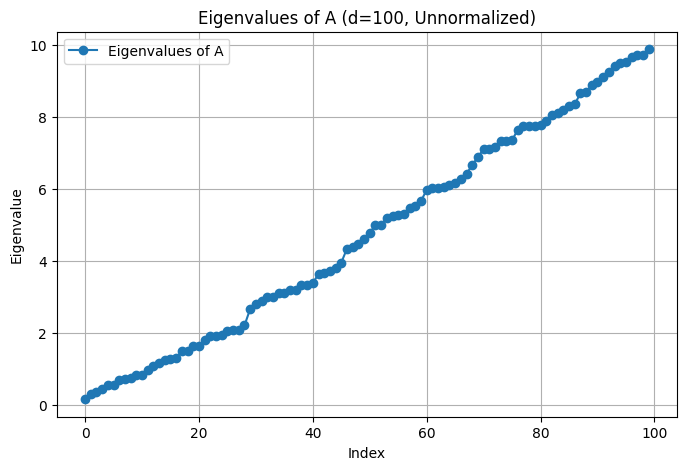

In [110]:
# Compute eigenvalues of A
eigenvalues = eigh(A, eigvals_only=True)

# Plot eigenvalues
plt.figure(figsize=(8, 5))
plt.plot(np.sort(eigenvalues), 'o-', label="Eigenvalues of A")
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.title(f"Eigenvalues of A (d={d}, {normalization_status})")
plt.legend()
plt.grid(True)
plt.show()